# DEPENDANCIES AND SETUP

Installing kaggle and uploading the API key necessary to use it.

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sarcasm/train-balanced-sarc.csv.gz
/kaggle/input/sarcasm/train-balanced-sarcasm.csv
/kaggle/input/sarcasm/test-balanced.csv
/kaggle/input/sarcasm/test-unbalanced.csv


In [45]:
!pip install -q kaggle
# from google.colab import files
# from google.colab import userdata
import os
# files.upload(); #Upload kaggle.json - you can get from the kaggle account settings, from the API section.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [46]:
# UNCOMMENT BELOW IF YOU'RE RUNNING THE NOTEBOOK OUTSIDE KAGGLE

# kaggle_api_key = open('kaggle.json', "w+")
# kaggle_api_key.write('<this is where you copy the contents of your kaggle.json>') # kaggle.json - you can get it from the kaggle account settings, from the API section.
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list

Installing packages necessary to use torch's transformers.

In [47]:
!pip install tqdm boto3 requests regex sentencepiece sacremoses botocore>=1.34.79

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


To use the API, credentials need to be copied into the kaggle folder. If everything works, the output will show the list of available datasets.

import json

In [48]:
import json

Preparing the ivy library.

In [49]:
#Insert the correct user when cloning the repos. Make sure that they are up-to-date.

!git clone "https://github.com/Kacper-W-Kozdon/demos.git"
# !git clone "https://github.com/Kacper-W-Kozdon/ivy.git"
!pip install -U -q paddlepaddle ivy accelerate>=0.21.0  2>/dev/null # If ran in a notebook with only cpu enabled, edit "paddlepaddle-gpu" to "paddlepaddle"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


fatal: destination path 'demos' already exists and is not an empty directory.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Next: import the ivy library and get the dataset.

In [50]:
import ivy

Import the libraries suggested in the model which is to be transpiled.

In [51]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import gc  # For garbage collection to manage memory
import re  # For regular expressions
import numpy as np  # For numerical operations and arrays
import tensorflow as tf
import torch  # PyTorch library for deep learning
import paddle

In [52]:
# Libraries to accompany torch's transformers
import tqdm
import boto3
import requests
import regex
import sentencepiece
import sacremoses

import warnings  # For handling warnings
warnings.filterwarnings("ignore")  # Ignore warning messages

from transformers import AutoModel, AutoTokenizer  # Transformers library for natural language processing
# from transformers import TextDataset, LineByLineTextDataset, DataCollatorForLanguageModeling, \
# pipeline, Trainer, TrainingArguments, DataCollatorWithPadding  # Transformers components for text processing
from transformers import TextDataset, LineByLineTextDataset, DataCollatorForLanguageModeling, \
pipeline, TrainingArguments, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification  # Transformer model for sequence classification

import accelerate

# from nlp import Dataset  # Import custom 'Dataset' class for natural language processing tasks
from imblearn.over_sampling import RandomOverSampler  # For oversampling to handle class imbalance
# import datasets  # Import datasets library
# from datasets import Dataset, Image, ClassLabel  # Import custom 'Dataset', 'ClassLabel', and 'Image' classes
from transformers import pipeline  # Transformers library for pipelines
from bs4 import BeautifulSoup  # For parsing HTML content

import matplotlib.pyplot as plt  # For data visualization
import itertools  # For working with iterators
from sklearn.metrics import (  # Import various metrics from scikit-learn
    accuracy_score,  # For calculating accuracy
    roc_auc_score,  # For ROC AUC score
    confusion_matrix,  # For confusion matrix
    classification_report,  # For classification report
    f1_score  # For F1 score
)

# from datasets import load_metric  # Import load_metric function to load evaluation metrics

from tqdm import tqdm  # For displaying progress bars

tqdm.pandas()  # Enable progress bars for pandas operations

In [53]:
device = "gpu:0" if torch.cuda.is_available() else "cpu"
# This line checks if a CUDA-enabled GPU is available.
# If a GPU is available, it sets the device to "gpu:0" (the first GPU).
# If no GPU is available, it sets the device to "cpu".

ivy.set_default_device(device)
# This line sets the default device for Ivy operations.
# Ivy will use the device specified above (either "gpu:0" or "cpu") for all computations.

ivy.set_soft_device_mode(True)
# This line enables Ivy's "soft device mode".
# In soft device mode, Ivy will attempt to automatically move tensors to the correct device
# when performing operations involving tensors on different devices.
# This can simplify tensor management and device handling in certain cases.


In [56]:
print(ivy.default_device())
# This line prints the current default device set in Ivy.
# It will print either "gpu:0" or "cpu", depending on the device specified earlier.

print(ivy.num_gpus())
# This line prints the number of CUDA-enabled GPUs available on the system.
# If one or more GPUs are available, it will print the number of GPUs.
# If no GPU is available, it will print 0.

print(torch.cuda.is_available())
# This line checks if PyTorch can access a CUDA-enabled GPU.
# PyTorch is a popular machine learning library, and it uses CUDA for GPU acceleration.
# If a CUDA-enabled GPU is available and PyTorch can access it, this line will print True.
# If no CUDA-enabled GPU is available or PyTorch cannot access it, this line will print False.

gpu:0
2
True


Set the seeds.

In [57]:
tf.keras.utils.set_random_seed(0)
# This line sets a seed value for the random number generator used by TensorFlow and Keras.
# Setting a seed allows you to reproduce the same results across different runs.
# In this case, the seed is set to 0, which is a common value used for reproducibility.

torch.manual_seed(0)
# This line sets the seed for the random number generator used by PyTorch.
# Similar to the TensorFlow seed, it helps ensure reproducibility of results.
# The seed value is set to 0 here.

paddle.seed(0)
# This line sets the seed for the random number generator used by PaddlePaddle.
# PaddlePaddle is another deep learning framework, and setting the seed ensures reproducibility.
# Again, the seed value is set to 0 for consistency across frameworks.

Get the API key for ivy transpiler from your account and upload it to the project. Move it to the correct directory.

In [13]:
pwd

'/kaggle/working'

First we're loading the tokenizer and the model from torch. All of the basic set-up instructions can be found here: https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/huggingface_pytorch-transformers.ipynb#scrollTo=72d8f2de

In [14]:
tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-cased')


Downloading: "https://github.com/huggingface/pytorch-transformers/zipball/main" to /root/.cache/torch/hub/main.zip


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [15]:
#import ivy libraries

from ivy.stateful.module import Module
from ivy.stateful.sequential import Sequential
from ivy.stateful.layers import *
from ivy.stateful.losses import *
from ivy.stateful.optimizers import *
from ivy.stateful.activations import *
from ivy.stateful.initializers import *
from ivy.stateful.norms import *


In [16]:
#importing dataset and preprocessing
df = pd.read_csv("/kaggle/input/sarcasm/train-balanced-sarcasm.csv")
df = df.drop_duplicates()
df = df.rename(columns={'comment': 'title'})
df = df[['label', 'title']]
df = df[~df['label'].isnull()]
df = df[~df['title'].isnull()]
df.sample(5)

,label,title
472347,1,Isn't gentrification wonderful?
601414,0,He's still alive and older than you so take tips
664600,0,cow-erkraut.
299709,1,The Q could stand for Quality!
339378,1,I can't believe the gays did this to him!


# DATASET AND MODEL OVERVIEW

In [17]:
!echo -n API_KEY > .ivy/key.pem

/bin/bash: .ivy/key.pem: No such file or directory


In [18]:
def count_words(text: str) -> int:
    return len(text.split())

def count_symbols(text: str) -> int:
    return len("".join(text.split()))

def symbol_to_word_ratio(text: str) -> float:
    return count_symbols(text)/count_words(text)

def upper_lower_ratio(text: str) -> float:
    text = "".join(text.split())
    return sum(1 for c in text if c.isupper())/(max([sum(1 for c in text if c.islower()), 1]))

df['word_count'] = df["title"].apply(count_words)
df['symbol_count'] = df["title"].apply(count_symbols)
df["upper_lower_ratio"] = df["title"].apply(upper_lower_ratio)
df["symbol_to_word_ratio"] = df["title"].apply(symbol_to_word_ratio)
df.sample(5)

,label,title,word_count,symbol_count,upper_lower_ratio,symbol_to_word_ratio
627321,0,How do people keep getting matches on Tinder?,8,38,0.057143,4.750000
378524,0,"Same thing happened to me, so it's definitely ...",13,62,0.017241,4.769231
96238,0,"I agree with you, but too much of a good thing...",17,53,0.020000,3.117647
598116,0,'Twas a joke I do believe.,6,21,0.117647,3.500000
217680,0,[M] it will get bigger depending on luck of th...,11,42,0.025641,3.818182


A few plots to see some some characteristics of the data.

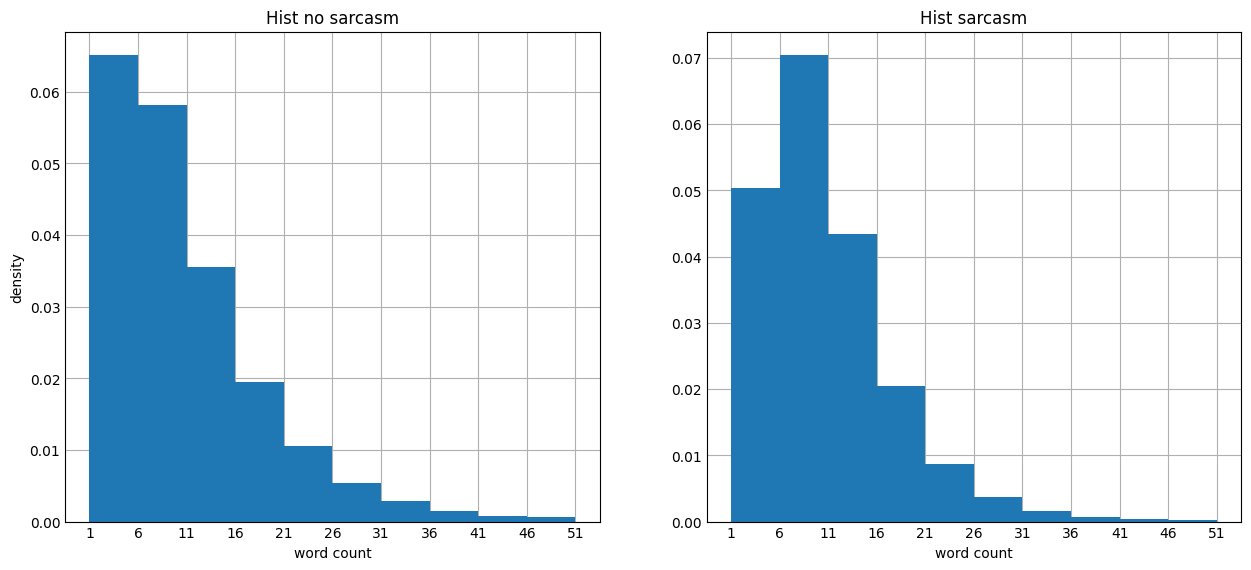

In [19]:
df_no_sarc = df.where(df["label"] == 0)
df_no_sarc = df_no_sarc.where(df_no_sarc["word_count"] <= 51)
df_sarc = df.where(df["label"] == 1)
df_sarc = df_sarc.where(df_sarc["word_count"] <= 51)
df_no_sarc = df_no_sarc[np.isfinite(df_no_sarc["word_count"])]
df_sarc = df_sarc[np.isfinite(df_sarc["word_count"])]
plt.style.use('_mpl-gallery-nogrid')

hist_df_no_sarc, bin_edges_no = np.histogram(df_no_sarc["word_count"].values, density=True)
hist_df_sarc, bin_edges = np.histogram(df_sarc["word_count"].values, density=True)
# plot:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bin_mids_no = [(bin_edges_no[i+1] + bin_edges_no[i])/2 for i in range(len(bin_edges_no) - 1)]
bin_mids = [(bin_edges[i+1] + bin_edges[i])/2 for i in range(len(bin_edges) - 1)]
ax1.bar(bin_mids_no, hist_df_no_sarc, width=bin_edges_no[1] - bin_edges_no[0])
ax2.bar(bin_mids, hist_df_sarc, width=bin_edges[1] - bin_edges[0])
ax1.set_title("Hist no sarcasm")
ax1.set_ylabel("density")
ax1.set_xlabel("word count")
ax1.set_xticks(bin_edges_no)
ax1.grid(True)
ax2.set_title("Hist sarcasm")
ax2.set_xlabel("word count")
ax2.set_xticks(bin_edges)
ax2.grid(True)
plt.show()

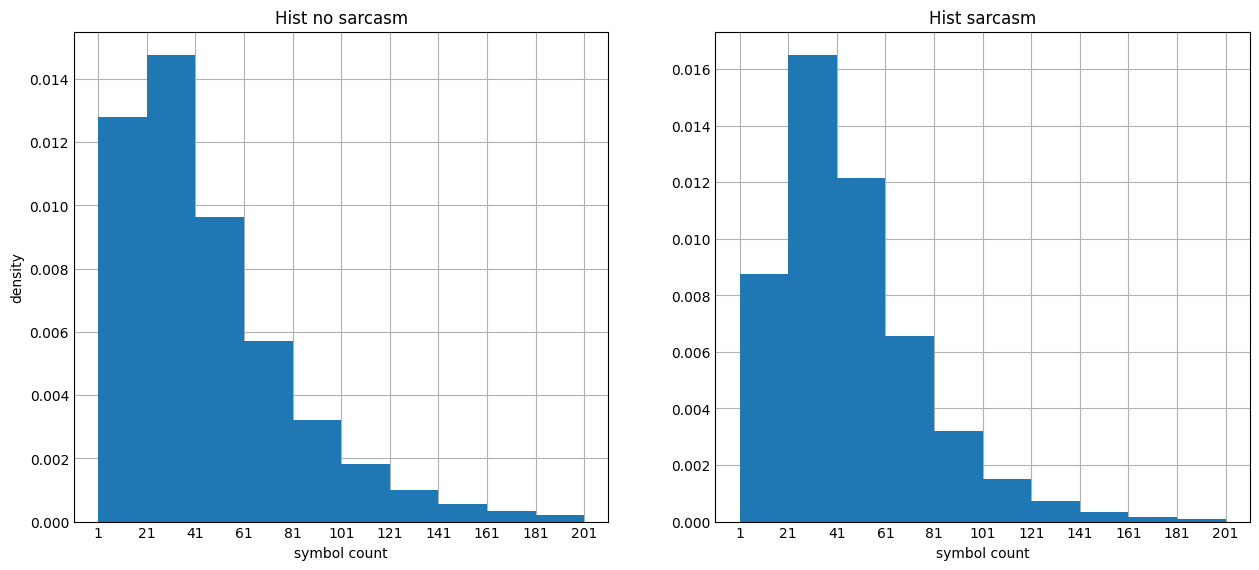

In [20]:
df_no_sarc = df.where(df["label"] == 0)
df_no_sarc = df_no_sarc.where(df_no_sarc["symbol_count"] <= 201)
df_sarc = df.where(df["label"] == 1)
df_sarc = df_sarc.where(df_sarc["symbol_count"] <= 201)
df_no_sarc = df_no_sarc[np.isfinite(df_no_sarc["symbol_count"])]
df_sarc = df_sarc[np.isfinite(df_sarc["symbol_count"])]
plt.style.use('_mpl-gallery-nogrid')

hist_df_no_sarc, bin_edges_no = np.histogram(df_no_sarc["symbol_count"].values, density=True)
hist_df_sarc, bin_edges = np.histogram(df_sarc["symbol_count"].values, density=True)
# plot:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bin_mids_no = [(bin_edges_no[i+1] + bin_edges_no[i])/2 for i in range(len(bin_edges_no) - 1)]
bin_mids = [(bin_edges[i+1] + bin_edges[i])/2 for i in range(len(bin_edges) - 1)]
ax1.bar(bin_mids_no, hist_df_no_sarc, width=bin_edges_no[1] - bin_edges_no[0])
ax2.bar(bin_mids, hist_df_sarc, width=bin_edges[1] - bin_edges[0])
ax1.set_title("Hist no sarcasm")
ax1.set_ylabel("density")
ax1.set_xlabel("symbol count")
ax1.set_xticks(bin_edges_no)
ax1.grid(True)
ax2.set_title("Hist sarcasm")
ax2.set_xlabel("symbol count")
ax2.set_xticks(bin_edges)
ax2.grid(True)
plt.show()

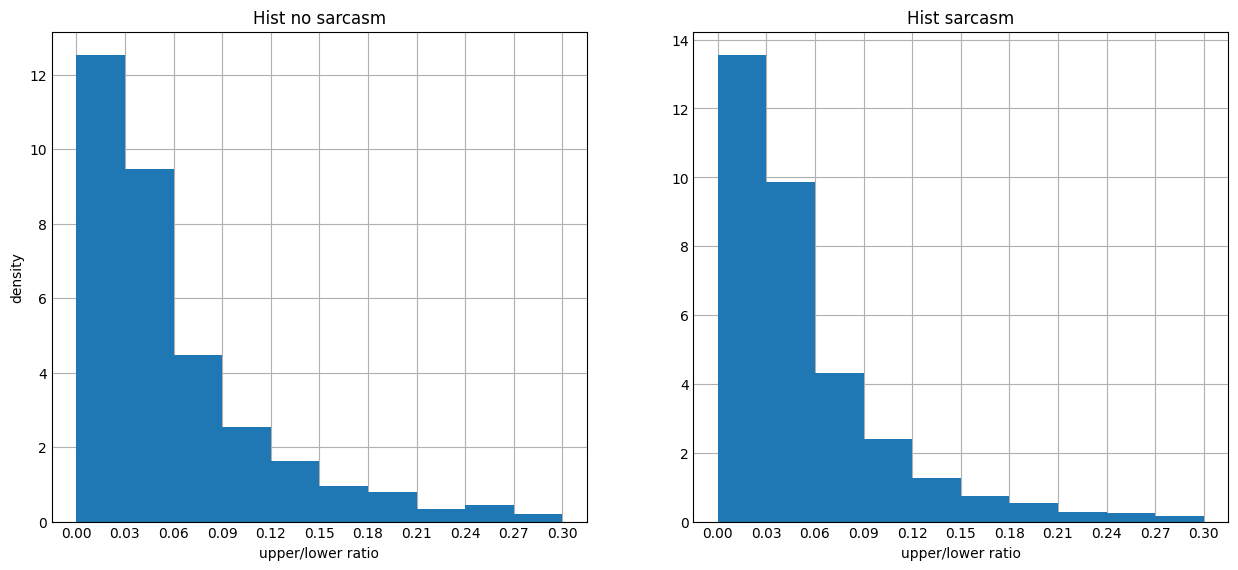

In [21]:
df_no_sarc = df.where(df["label"] == 0)
df_no_sarc = df_no_sarc.where(df_no_sarc["upper_lower_ratio"] <= 0.3)
df_sarc = df.where(df["label"] == 1)
df_sarc = df_sarc.where(df_sarc["upper_lower_ratio"] <= 0.3)
df_no_sarc = df_no_sarc[np.isfinite(df_no_sarc["upper_lower_ratio"])]
df_sarc = df_sarc[np.isfinite(df_sarc["upper_lower_ratio"])]
plt.style.use('_mpl-gallery-nogrid')

hist_df_no_sarc, bin_edges_no = np.histogram(df_no_sarc["upper_lower_ratio"].values, density=True)
hist_df_sarc, bin_edges = np.histogram(df_sarc["upper_lower_ratio"].values, density=True)
# plot:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bin_mids_no = [(bin_edges_no[i+1] + bin_edges_no[i])/2 for i in range(len(bin_edges_no) - 1)]
bin_mids = [(bin_edges[i+1] + bin_edges[i])/2 for i in range(len(bin_edges) - 1)]
ax1.bar(bin_mids_no, hist_df_no_sarc, width=bin_edges_no[1] - bin_edges_no[0])
ax2.bar(bin_mids, hist_df_sarc, width=bin_edges[1] - bin_edges[0])
ax1.set_title("Hist no sarcasm")
ax1.set_ylabel("density")
ax1.set_xlabel("upper/lower ratio")
ax1.set_xticks(bin_edges_no)
ax1.grid(True)
ax2.set_title("Hist sarcasm")
ax2.set_xlabel("upper/lower ratio")
ax2.set_xticks(bin_edges)
ax2.grid(True)
plt.show()

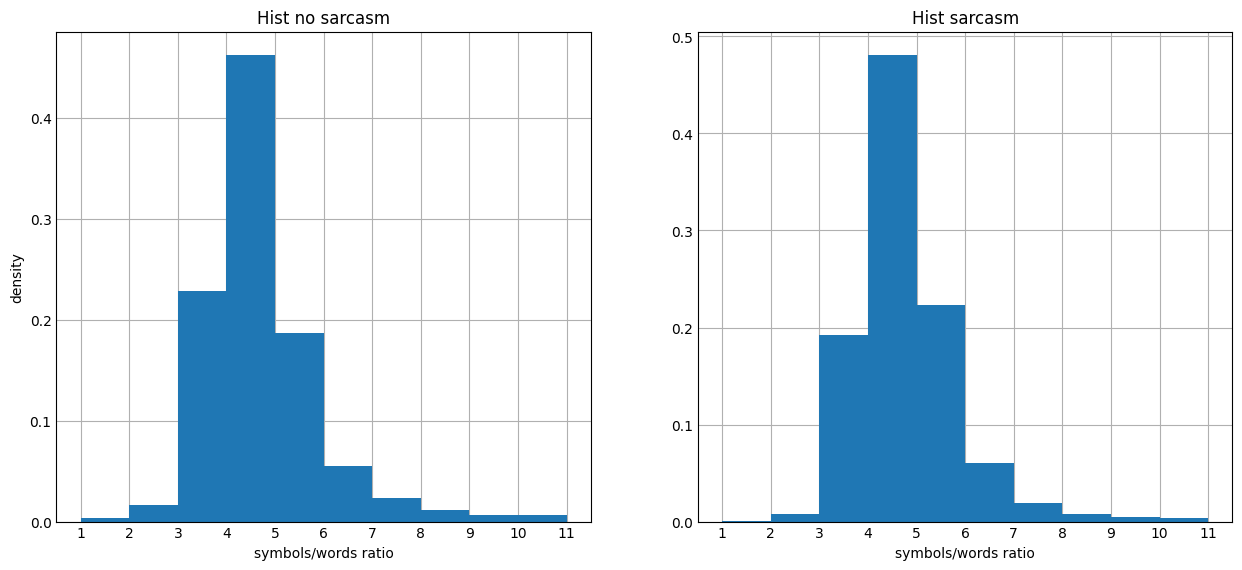

In [22]:
df_no_sarc = df.where(df["label"] == 0)
df_no_sarc = df_no_sarc.where(df_no_sarc["symbol_to_word_ratio"] <= 11)
df_sarc = df.where(df["label"] == 1)
df_sarc = df_sarc.where(df_sarc["symbol_to_word_ratio"] <= 11)
df_no_sarc = df_no_sarc[np.isfinite(df_no_sarc["symbol_to_word_ratio"])]
df_sarc = df_sarc[np.isfinite(df_sarc["symbol_to_word_ratio"])]
plt.style.use('_mpl-gallery-nogrid')

hist_df_no_sarc, bin_edges_no = np.histogram(df_no_sarc["symbol_to_word_ratio"].values, density=True)
hist_df_sarc, bin_edges = np.histogram(df_sarc["symbol_to_word_ratio"].values, density=True)
# plot:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bin_mids_no = [(bin_edges_no[i+1] + bin_edges_no[i])/2 for i in range(len(bin_edges_no) - 1)]
bin_mids = [(bin_edges[i+1] + bin_edges[i])/2 for i in range(len(bin_edges) - 1)]
ax1.bar(bin_mids_no, hist_df_no_sarc, width=bin_edges_no[1] - bin_edges_no[0])
ax2.bar(bin_mids, hist_df_sarc, width=bin_edges[1] - bin_edges[0])
ax1.set_title("Hist no sarcasm")
ax1.set_ylabel("density")
ax1.set_xlabel("symbols/words ratio")
ax1.set_xticks(bin_edges_no)
ax1.grid(True)
ax2.set_title("Hist sarcasm")
ax2.set_xlabel("symbols/words ratio")
ax2.set_xticks(bin_edges)
ax2.grid(True)
plt.show()

In [23]:
gc.collect()

24829

# BUILDING LSTM ON CORE IVY

In [24]:
# dir(tokenizer)

Setting up the device for the computations.

In [25]:
#imports the cuDF library (CUDA Data Frame) into your Python environment.
import cudf

In [26]:
train_test_ratio = 0.9
frac_dataset = 0.02

In [27]:
#importing dataset and preprocessing

df = cudf.read_csv("/kaggle/input/sarcasm/train-balanced-sarcasm.csv")
df = df.drop_duplicates()
df = df.rename(columns={'comment': 'title'})
df = df[['label', 'title']]
df = df[~df['label'].isnull()]
df = df[~df['title'].isnull()]
df.sample(frac=1).reset_index(drop=True)
df.sample(5)


get_mempolicy: Operation not permitted


,label,title
427824,1,What an absolute fucking professional
284023,1,I thought we still were at ddr4... Crazy world
88830,1,"I think if Jan were to leave tomorrow, he'd ge..."
331949,1,say bye to guild system.. they ninja-ed it
573293,1,"Overclocking is easy, just change a few bios s..."


In [28]:
df_full = df # Create a copy of the original dataframe
df_size = len(df_full) # Get the total number of rows in the dataframe
split = int(df_size * train_test_ratio * frac_dataset) # Calculate the split index for the training set
cutoff = int(df_size * frac_dataset) # Calculate the cutoff index for the evaluation set

# Split the dataframe into training and evaluation sets
df = df_full.iloc[:split,:] # Training set
df_eval = df_full.iloc[split:cutoff,:] # Evaluation set

print(len(df)) # Print the number of rows in the training set

18193


In [42]:
print(torch.cuda.is_available())
# Check if PyTorch can access a CUDA-enabled GPU

device = ivy.as_native_dev("gpu:0")
# Get the Ivy device object for "gpu:0" (the first CUDA-enabled GPU)

ivy.set_default_device("gpu:0")
# Set the default device in Ivy to "gpu:0"

print(ivy.default_device())
# Print the current default device in Ivy

ivy.set_soft_device_mode(True)
# Enable Ivy's soft device mode, which automatically moves tensors to the correct device

print(device)
# Print the Ivy device object for "gpu:0"

True
gpu:0
cuda:0


In [30]:
print(tokenizer.vocab_size)
# Print the size of the vocabulary (number of unique tokens) used by the tokenizer

print(tokenizer.all_special_tokens_extended)
# Print a list of all special tokens (e.g., padding token, start/end of sequence tokens) used by the tokenizer, including those added by extensions

print(tokenizer.all_special_ids)
# Print a list of token IDs corresponding to the special tokens used by the tokenizer

print(tokenizer.pad_token_id)
# Print the token ID assigned to the padding token used by the tokenizer for padding sequences to a fixed length

28996
['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']
[100, 102, 0, 101, 103]
0


In [31]:
sample = list(df.sample(8)["title"].to_pandas())
# Sample 8 rows from the "title" column of the DataFrame df, convert the result to a pandas Series, and store the values in the list sample

print(sample)
# Print the sampled titles

tokenizer(sample, add_special_tokens=True, padding=True, truncation=True)
# Apply the tokenizer to the sampled titles

['Yeah, based on the "choices", Kanye West looks appealing.', 'This was the year Roman started pumping money into their club, the year the BPL chsnged and not for the better.', 'Well, we don\'t have a culture of our own, so I guess that\'s why we should just abandon any of these so-called "traditions" right?', 'Also a bigger terminal velocity', "Yeah let's just get over the fact that the president is a complete fucking manchild", "#'MURICA", "Because civil disobedience isn't a thing and it would be sooooo much work to convince people to not pay their federal taxes.", 'Imaginary :c']


{'input_ids': [[101, 2814, 117, 1359, 1113, 1103, 107, 9940, 107, 117, 14812, 3382, 1162, 1537, 2736, 17117, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1188, 1108, 1103, 1214, 2264, 1408, 15486, 1948, 1154, 1147, 1526, 117, 1103, 1214, 1103, 21062, 2162, 22572, 1116, 18288, 1105, 1136, 1111, 1103, 1618, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2119, 117, 1195, 1274, 112, 189, 1138, 170, 2754, 1104, 1412, 1319, 117, 1177, 146, 3319, 1115, 112, 188, 1725, 1195, 1431, 1198, 11092, 1251, 1104, 1292, 1177, 118, 1270, 107, 7181, 107, 1268, 136, 102], [101, 2907, 170, 6706, 6020, 10537, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2814, 1519, 112, 188, 1198, 1243, 1166, 1103, 1864, 1115, 1103, 2084, 1110, 170, 2335, 8750, 1299, 21289, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 108, 112, 150, 19556, 9741, 1592, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [32]:
# Import the Dataset class from the torch.utils.data module.
from torch.utils.data import Dataset

In [33]:
batch_size = 128

# Define a custom dataset class named 'ivy_Dataset'.
class ivy_Dataset(Dataset):
    def __init__(self, df):
        # Initialize the dataset with the given dataframe 'df'.
        # Store the number of samples in the dataset.
        self.num_samples = df['title'].size
        # Extract 'title' and 'label' from the dataframe and store as data.
        self.data = [[entry[0], entry[1]] for entry in zip(df["title"].to_pandas(), df["label"].to_pandas())]

    def __getitem__(self, idx):
        # Retrieve and return the data at the given index 'idx'.
        title = self.data[idx][0]
        label = self.data[idx][1]
        return title, label

    def __len__(self):
        # Return the total number of samples in the dataset.
        return self.num_samples




In [34]:
training_data = ivy_Dataset(df)# Access the label of the 10th data sample in the 'data_sample' list.


In [35]:
# Randomly sample 10 entries from the dataframe 'df' and store it as 'df_sample'.
df_sample = df.sample(10)

# Extract 'title' and 'label' from the sampled dataframe and store as 'data_sample'.
data_sample = [[entry[0], entry[1]] for entry in zip(df_sample["title"].to_pandas(), df_sample["label"].to_pandas())]

# Access the label of the 10th data sample in the 'data_sample' list.
data_sample[9][1]

0

In [36]:
# Import the DataLoader class from the torch.utils.data module.
from torch.utils.data import DataLoader

# Create a DataLoader instance named 'train_dataloader' for the training data.
# Set the batch size to 'batch_size', shuffle the data during each epoch.
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)


In [37]:
def ivy_train_loader(dataset=df, batch_size=4):
    # Calculate the number of batches based on the dataset size and batch size.
    num_batches = int(len(dataset) / batch_size)

    # Generate batches of data using list comprehension.
    out = (
        (
            dataset["title"][batch_idx * batch_size : batch_idx * batch_size + batch_size].to_pandas(),
            dataset["label"][batch_idx * batch_size : batch_idx * batch_size + batch_size].to_pandas()
        )
        for batch_idx in range(num_batches)
    )

    return out

# Create a loader using the ivy_train_loader function with the specified batch size.
loader = ivy_train_loader(batch_size=batch_size)

# Iterate over the loader with tqdm for progress tracking.
for batch_id, data in tqdm(enumerate(loader)):
    # Extract input and target data from the batch.
    x_data = data[0]
    y_data = data[1]

    # Print additional information or perform computations as needed.
    if batch_id == 10:
        break


10it [00:00, 371.74it/s]


In [38]:
# Iterate over the train_dataloader with tqdm for progress tracking.
for batch_id, data in tqdm(enumerate(train_dataloader)):
    # Extract input and target data from the batch.
    x_data = data[0]
    y_data = data[1]

    # Print additional information or perform computations as needed.
    if batch_id == 10:
        break


10it [00:00, 475.18it/s]


It seems that in this case just a simple generator is comparable or slightly faster than a proper data loader.

In [39]:
def one_hot(args, num_classes=2):
    # Generate one-hot encoding for each element in 'args'.
    out = [[1 if idx == elem else 0 for idx in range(num_classes)] for elem in args]
    return out

def argmax(args):
    # Find the index of the maximum value in each array in 'args'.
    out = [ivy.argmax(elem) for elem in args]
    return out

# Test the one_hot and argmax functions.
print(one_hot([0, 0, 1, 0]))
print(argmax(ivy.array([[0.49967843, 0.50032151],
                       [0.49986687, 0.50013322],
                       [0.49912587, 0.50087422],
                       [0.50080854, 0.4991914 ],
                       [0.50049627, 0.4995037 ],
                       [0.4998956 , 0.50010443],
                       [0.50008798, 0.49991205],
                       [0.50053447, 0.49946556]])))

[[1, 0], [1, 0], [0, 1], [1, 0]]
[ivy.array(1), ivy.array(1), ivy.array(1), ivy.array(0), ivy.array(0), ivy.array(1), ivy.array(0), ivy.array(0)]


In [40]:
# Set the backend to "torch" for Ivy library.
ivy.set_backend("torch")

# Define various parameters and variables.
num_embeddings = tokenizer.vocab_size
embedding_dim = 10
pad_token_id = tokenizer.pad_token_id
input_channels = embedding_dim
num_classes = 2
output_channels = 10
num_layers = 1
max_length = 128
max_length = max_length - 3
tokenizer.model_max_length = max_length
eps = 1e-05
batch_size = 128

# Generate testing input and labels.
testing_input = df.sample(batch_size)["title"]
testing_labels = df.sample(batch_size)["label"]

# Calculate the linear input and output channels.
linear_input_channels = (tokenizer.model_max_length + 3) * batch_size * output_channels  # 3 comes from the hidden states of the LSTM
linear_output_channels = num_classes * batch_size

# Define the normalized shape.
normalized_shape = (num_classes)

# Define a custom module for post-processing LSTM output.
class LSTM_postproc(Module):
    def __init__(self):
        super(LSTM_postproc, self).__init__()

    def _forward(self, args):
        lstm_output, lstm_state = args
        lstm_state_latest, lstm_state_hidden = lstm_state
        lstm_state_latest = ivy.array(lstm_state_latest)
        lstm_state_hidden = ivy.array([state for state in lstm_state_hidden][0])

        lstm_state = ivy.concat((lstm_state_latest, lstm_state_hidden), axis=0).reshape((batch_size, 3, -1))
        out = ivy.concat([lstm_output, lstm_state], axis=1)
        out = out.flatten()
        return out

# Define a custom module for tokenizing input.
class Tokenizer(Module):
    def __init__(self, tokenizer):
        super(Tokenizer, self).__init__()
        self.tokenizer = tokenizer

    def _forward(self, args):
        args = list(args)
        return self.tokenizer(args, add_special_tokens=True, max_length=max_length, padding="max_length", truncation=True)["input_ids"]

# Define a custom module for reshaping output.
class Reshaper(Module):
    def __init__(self):
        super(Reshaper, self).__init__()

    def _forward(self, args):
        return args.reshape((batch_size, num_classes))

# Define a custom module for performing argmax operation.
class Argmax(Module):
    def __init__(self):
        super(Argmax, self).__init__()

    def _forward(self, args):
        return ivy.argmax(args, axis=-1)

# Define a custom module for embedding.
class ivy_Embed(Module):
    def __init__(self, embedding):
        super(ivy_Embed, self).__init__()
        self.embedding = embedding

    def _forward(self, args):
        out = self.embedding(args).float()
        return out

# Initialize the embedding layer.
embedding = Embedding(num_embeddings, embedding_dim, pad_token_id)

# Define the neural network architecture using Sequential.
ivy_LSTM = Sequential(
    ivy_Embed(embedding),
    LSTM(input_channels, output_channels, num_layers=num_layers, return_sequence=True, return_state=True, device=None, v=None, dtype=None),
    LSTM_postproc(),
    Linear(linear_input_channels, linear_output_channels, with_bias=True),
    Reshaper(),
    Sigmoid(),
    Softmax(),
)


In [ ]:
def train_tokens_loader(dataset = df):
    train_loader = ivy_train_loader(dataset=dataset, batch_size=batch_size)
    ivy_tokenizer = Tokenizer(tokenizer)
    loaded_data = []
    data_dict = dict()
    for batch_id, data in tqdm(enumerate(train_loader)):

        x_data = ivy.array(ivy_tokenizer(data[0]), device=device).long()
        y_data = ivy.array(one_hot(list(data[1])), device=device)

        loaded_data.append([x_data, y_data])
        data_dict[f"batch{batch_id}"] = {"x_data": x_data, "y_data": y_data}
        
    loaded_data = ivy.array(loaded_data, device=device)
    return loaded_data, data_dict

loaded_tokens, tokens_dict = train_tokens_loader(df_full)

with open("tokenized_dataset.json", "w") as outfile: 
    json.dump(tokens_dict, outfile)
!cp "tokenized_dataset.json" "/kaggle/working/demos/Contributor_demos/Sarcasm Detection/"

1it [00:17, 17.27s/it]

In [ ]:
def train_ivy(model):
    logs = []
    learning_rate = 3e-4
    opt = SGD(lr=learning_rate, inplace=True, stop_gradients=True, trace_on_next_step=False)
    loss_fn = CrossEntropyLoss(axis=-1, epsilon=1e-07, reduction='mean')
    epochs = 2
#     grads = ivy.zeros_like(model.v)
    classifier = model
    ivy_tokenizer = Tokenizer(tokenizer)

    def loss(params):
        v, model, x, y = params
        predictions = model(x, v=v).flatten().to(device)
        return loss_fn(y, predictions)

    def one_hot(args, num_classes=2):
        # Convert labels to one-hot encoding.
        out = ivy.array([[1 if idx == elem else 0 for idx in range(num_classes)] for elem in args], device=device).flatten()
        return out.long()
    
    for epoch in range(epochs):
        # Iterate over the training loader for each epoch.
        for batch_id, data in tqdm(enumerate(loaded_tokens):

            x_data = ivy.array(ivy_tokenizer(data[0]), device=device).long()
            y_data = one_hot(list(data[1]))

            # Compute loss and gradients
            loss_val, grads = ivy.execute_with_gradients(loss, (model.v, model, x_data, y_data))

            # Update parameters using SGD optimizer
            model.v = opt.step(model.v, grads)

            if batch_id % 100 == 0:
                # Log loss values periodically
                logs.append([[epoch, batch_id, loss_val]])

      # opt.clear_grad()
    gc.collect()

    return logs, model


In [ ]:
# Train the Ivy LSTM model using the custom training function.
logs, ivy_LSTM = train_ivy(ivy_LSTM)


In [80]:
# Save the trained Ivy LSTM model.
ivy_LSTM.save("Ivy_Sarcasm_Detection_Demo")
ivy_LSTM.save_weights("/kaggle/working/demos/Contributor_demos/Sarcasm Detection/Ivy_Sarcasm_Detection_Demo_weights.hdf5")

# Copy the saved model to the specified directory.
!cp "Ivy_Sarcasm_Detection_Demo" "/kaggle/working/demos/Contributor_demos/Sarcasm Detection/"


TypeError: Can't broadcast (1, 10) -> (1, 3)

In [ ]:
with open('logs.csv','w',encoding = 'utf-8') as f:
    f.write("epoch, batch_id, loss_val")
    for entry in logs:
        f.write(f"{entry[0][0]}, {entry[0][1]}, {entry[0][2]}")
        
!cp logs.csv "/kaggle/working/demos/Contributor_demos/Sarcasm Detection"

In [ ]:
# Set the Ivy LSTM model to evaluation mode.
ivy_LSTM.eval()

# Disable training mode for the Ivy LSTM model.
ivy_LSTM.train(False)


In [ ]:
def eval_ivy(model):
    logs = []
    learning_rate = 3e-5
    opt = SGD(lr=learning_rate, inplace=True, stop_gradients=True, trace_on_next_step=False)
    loss_fn = CrossEntropyLoss(axis=-1, epsilon=1e-07, reduction='mean')
    epochs = 2
    grads = ivy.zeros_like(model.v)
    classifier = model
    train_loader = ivy_train_loader(dataset=df_eval, batch_size=batch_size)
    ivy_tokenizer = Tokenizer(tokenizer)

    def loss(params):
        v, model, x, y = params
        predictions = model(x, v=v).flatten()
        return loss_fn(y, predictions)

    def one_hot(args, num_classes=2):
        # Convert labels to one-hot encoding.
        out = ivy.array([[1 if idx == elem else 0 for idx in range(num_classes)] for elem in args]).flatten()
        return out.long()
    
    for batch_id, data in tqdm(enumerate(loaded_data)):

        x_data = ivy.array(ivy_tokenizer(data[0])).long()
        y_data = one_hot(list(data[1])).long()

        # Compute predictions
        predictions = classifier(x_data).float()
        predictions = ivy.argmax(predictions, axis=-1).flatten().float()
        predictions = one_hot(list(predictions)).reshape(y_data.shape)

        # Compute accuracy
        acc = ivy.matmul(predictions.float(), y_data.float()).float() / batch_size

        # Compute loss
        loss_vals = loss((model.v, model, x_data, y_data))

        # Append loss and accuracy to logs
        logs.append([[loss_vals, acc]])

    # Clear gradients and release memory
    # opt.clear_grad()
    gc.collect()

    # Calculate mean loss and accuracy
    return ivy.mean(logs, axis=0)


In [ ]:
# Evaluate the Ivy LSTM model using the custom evaluation function.
logs_eval = eval_ivy(ivy_LSTM)

In [ ]:
# Print the evaluation results (mean loss and accuracy).
print(logs_eval)

In [139]:
# Print the number of samples in the evaluation dataset.
print(len(df_eval))

50538


In [140]:
# Define the train-test split ratio.
train_test_ratio = 0.95

# Define the fraction of the dataset to use.
frac_dataset = 1

# Calculate the size of the full dataset.
df_size = len(df_full)

# Calculate the index to split the dataset for training and evaluation.
split = int(df_size * train_test_ratio * frac_dataset)

# Define the cutoff index for the dataset fraction.
cutoff = int(df_size * frac_dataset)

# Extract the training dataset.
df = df_full.iloc[:split,:]

# Extract the evaluation dataset.
df_eval = df_full.iloc[split:cutoff,:]


In [ ]:
# Train the Ivy LSTM model using the custom training function.
logs, ivy_LSTM = train_ivy(ivy_LSTM)

93it [04:31,  2.93s/it]

In [ ]:
# Save the trained Ivy LSTM model.
ivy_LSTM.save("Ivy_Sarcasm_Detection_Demo")
ivy_LSTM.save_weights("/kaggle/working/demos/Contributor_demos/Sarcasm Detection/Ivy_Sarcasm_Detection_Demo_weights.hdf5")
# Copy the saved model to the specified directory.
!cp "Ivy_Sarcasm_Detection_Demo" /kaggle/working/demos/Contributor_demos/Sarcasm Detection


In [ ]:
with open('logs_full.csv','w',encoding = 'utf-8') as f:
    f.write("epoch, batch_id, loss_val")
    for entry in logs:
        f.write(f"{entry[0][0]}, {entry[0][1]}, {entry[0][2]}")
        
!cp logs.csv "/kaggle/working/demos/Contributor_demos/Sarcasm Detection"